In [1]:
import numpy as np
import codecs
import array
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt

def load_tdms(path, ch_num):
    ch = [[] for _ in range(ch_num)]
    with codecs.open(path, 'rb') as f:
        while True:
            # リードインと呼ばれる部分の読み込み
            tdms = f.read(28) 
            # print(f.tell())
            # print(tdms)
            #if b'TDSm' != tdms[:4]:
            #    continue

            # ファイルを最後まで読み込んだら終了
            if tdms==b'': 
                break

            # データとその区切りを取得
            # 次のセグメントの位置を抽出
            seg_ofs = tdms[12:20]
            by1 = array.array('l')
            by1.frombytes( seg_ofs )
            seg_ofs = np.asarray(by1)[0]
            # データの位置を抽出
            data_ofs= tdms[20:28] 
            by2 = array.array('l')
            by2.frombytes( data_ofs )
            data_ofs = np.asarray(by2)[0]

            # データのある部分まで読み飛ばす
            tdms = f.read(data_ofs)
            #print(tdms[:200], len(tdms))
            #if len(ch[0])==2:
            #    exit()
            #if len(ch[0])==0:
            #    head=tdms
            # データ部分の読み込み
            tdms = f.read(seg_ofs-data_ofs)
            by = array.array('f')
            by.frombytes( tdms )
            data = np.asarray( by )
            # print(data.shape)

            # 各チャンネルを取得
            for i in range(ch_num):
                ch[i].append( data[i::ch_num].reshape(-1,1) )

    for i in range(ch_num):
        ch[i] = np.vstack(ch[i])[:,0]

    return ch

In [12]:
last_t = 0

from datetime import datetime
start=datetime.now()

# for i in range(25, 504, 2):
for i in range(52, 53, 2):
    print(i)
    nc_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i}.tdms'
    c_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i+1}.tdms'

    dt = 1/(10**6)*3

    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[0])
    t_d = np.linspace(last_t, last_t + N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    cd_d = t_d*(190/60)/1000
    last_t = t_d[-1]

    nc_x_a = sum(nc_d[0]) / len(nc_d[0])
    nc_y_a = sum(nc_d[1]) / len(nc_d[1])
    nc_z_a = sum(nc_d[2]) / len(nc_d[2])

    x_g = 0.00895
    y_g = 0.00515
    z_g = 0.00804

    c_d_x = (c_d[0][:5000000] - nc_z_a)/ x_g 
    c_d_y = (c_d[1][:5000000] - nc_z_a)/ y_g 
    c_d_z = (c_d[2][:5000000] - nc_z_a)/ z_g 

    print(c_d_x)
    print(c_d_y)
    print(c_d_z)
    
#     one_rotation = 3900

#     N = len(c_d_x)
#     N_N = N - (int(N/one_rotation)) * one_rotation

#     c_d_x = c_d_x[:-N_N].reshape([int(N/one_rotation),one_rotation])
#     c_d_y = c_d_y[:-N_N].reshape([int(N/one_rotation),one_rotation])
#     c_d_z = c_d_z[:-N_N].reshape([int(N/one_rotation),one_rotation])
    
#     x_max = c_d_x.max(axis=1)
#     y_max = c_d_y.min(axis=1)
#     z_max = c_d_z.min(axis=1)
    
#     x_max_p = np.argmax(c_d_x, axis=1)
#     y_max_p = np.argmin(c_d_y, axis=1)
#     z_max_p = np.argmin(c_d_z, axis=1)
    
    
#     cd_d = cd_d[:5000000]
#     cd_d = cd_d[:-N_N].reshape([int(N/one_rotation),one_rotation])

#     cd_d_x = np.array([])
#     cd_d_y = np.array([])
#     cd_d_z = np.array([])

    

#     for j in range(int(N/one_rotation)):
#         cd_d_x = np.append(cd_d_x, cd_d[j][x_max_p[j]])
#         cd_d_y = np.append(cd_d_y, cd_d[j][y_max_p[j]])
#         cd_d_z = np.append(cd_d_z, cd_d[j][z_max_p[j]])


#     dict1 = dict(x_d = cd_d_x[:], y_d = cd_d_y[:], z_d = cd_d_z[:], x = x_max[:], y = y_max[:], z= z_max[:])
#     df1 = pd.DataFrame(data=dict1)
#     df1.to_csv(f'./cuttingForce_pure/cuttingForce_pure_{i+1}.csv')
    

# print(datetime.now() - start)

52
[-0.533385   -0.533385   -0.46092707 ...  3.7680593   3.7320435
  3.7320435 ]
[-62.639862 -62.702824 -62.702824 ... -61.82322  -61.76063  -61.82322 ]
[10.339575 10.419997 10.58084  ... 14.604302 14.725054 14.926227]


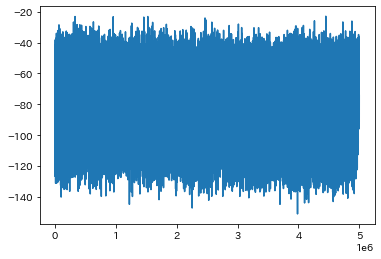

In [7]:
plt.plot(c_d_y)

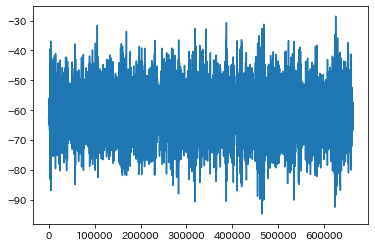

In [13]:
plt.plot(c_d_y)

In [12]:
last_t = 0

y = np.array([])

from datetime import datetime
start=datetime.now()

for i in range(25, 504, 2):
# for i in range(52, 55, 2):
    print(i)
    nc_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i}.tdms'
    c_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i+1}.tdms'

    dt = 1/(10**6)*3

    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[1])
    t_d = np.linspace(last_t, last_t + N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    cd_d = t_d*(190/60)/1000
    last_t = t_d[-1]

#     print(c_d[0])
#     print(c_d[1])
#     print(c_d[2])

    y = np.concatenate([y,c_d[1]])


#     y = np.array([])
#     for j in range(N):
#         np.append(y, c_d[1])
    
# print(y)
        
#     for j in range(int(N/one_rotation)):
#         cd_d_x = np.append(cd_d_x, cd_d[j][x_max_p[j]])
#         cd_d_y = np.append(cd_d_y, cd_d[j][y_max_p[j]])
#         cd_d_z = np.append(cd_d_z, cd_d[j][z_max_p[j]])

#     dict1 = dict(x_d = cd_d_x[:], y_d = cd_d_y[:], z_d = cd_d_z[:], x = x_max[:], y = y_max[:], z= z_max[:])
#     df1 = pd.DataFrame(data=dict1)
#     df1.to_csv(f'./cuttingForce_pure/cuttingForce_pure_{i+1}.csv')
    

df3 = pd.DataFrame(data=y)
df3.to_csv('cuttingForce_Amplitude_All_data.csv')
plt.plot(y)

    
print(datetime.now() - start)

25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
301
303
305
307
309
311
313
315
317
319
321
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351
353
355
357
359
361
363
365
367
369
371
373
375
377
379
381
383
385
387
389
391
393
395
397
399
401
403
405
407
409
411
413
415
417
419
421
423
425
427
429
431
433
435
437
439
441
443
445
447


KeyboardInterrupt: 

In [13]:
len(y)

1099820025

MemoryError: Unable to allocate 16.4 GiB for an array with shape (1099820025, 2) and data type float64

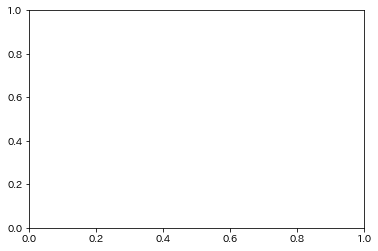

In [16]:
plt.plot(y)

In [17]:
df3 = pd.DataFrame(data=y)
df3.to_csv('cuttingForce_Amplitude_All_data.csv')

KeyboardInterrupt: 

In [ ]:
last_t = 0

z = np.array([])

from datetime import datetime
start=datetime.now()

for i in range(447, 504, 2):
# for i in range(52, 55, 2):
    print(i)
    nc_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i}.tdms'
    c_d_path = fr'C:\Users\pmg07\Desktop\2021_1115_切削実験\dyanano\Dynamometer_{i+1}.tdms'

    dt = 1/(10**6)*3

    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[1])
    t_d = np.linspace(last_t, last_t + N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    cd_d = t_d*(190/60)/1000
    last_t = t_d[-1]

#     print(c_d[0])
#     print(c_d[1])
#     print(c_d[2])

    z = np.concatenate([z,c_d[1]])


#     y = np.array([])
#     for j in range(N):
#         np.append(y, c_d[1])
    
# print(y)
        
#     for j in range(int(N/one_rotation)):
#         cd_d_x = np.append(cd_d_x, cd_d[j][x_max_p[j]])
#         cd_d_y = np.append(cd_d_y, cd_d[j][y_max_p[j]])
#         cd_d_z = np.append(cd_d_z, cd_d[j][z_max_p[j]])

#     dict1 = dict(x_d = cd_d_x[:], y_d = cd_d_y[:], z_d = cd_d_z[:], x = x_max[:], y = y_max[:], z= z_max[:])
#     df1 = pd.DataFrame(data=dict1)
#     df1.to_csv(f'./cuttingForce_pure/cuttingForce_pure_{i+1}.csv')


# df3 = pd.DataFrame(data=y)
# df3.to_csv('cuttingForce_Amplitude_All_data.csv')
# plt.plot(y)

    
print(datetime.now() - start)

In [6]:
a = np.array([])
print(a)
b = np.array([1,2,3])
a = np.concatenate([a,b])
a

[]


array([1., 2., 3.])

In [7]:
c = [4,5,6]
a = np.concatenate([a,c])
a

array([1., 2., 3., 4., 5., 6.])

In [9]:
df2 = pd.DataFrame(data=a)
df2.to_csv('aaa.csv')